In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# this is for local notebook
data = pd.read_csv('spship_dataset/train.csv')
# for kaggle notebook - do this instead
# data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [3]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


for now not dropping passenger id as it has group or family description - and also it needs to be submitted in test so dropping it does not make sense

dropping name columns 
not dropping rows as for test - not allowed to drop rows for submission 

one hot encoding and label encoding will be used 

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [7]:
one_hot_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

taking care of NaN/None values

In [8]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Since median is les affected by outliers, we will use median to fill the missing values
data['Age'] = data['Age'].fillna(data['Age'].median())

In [11]:
data.drop(columns=['Cabin', 'Name'], inplace=True)

In [17]:
data['CryoSleep'] = data['CryoSleep'].fillna(False).astype(bool)
# data['CryoSleep'].fillna(False, inplace=True)

In [18]:
data['VIP'] = data['VIP'].fillna(False).astype(bool)

In [19]:
data['HomePlanet'] = data['HomePlanet'].fillna('Unknown')  
data['Destination'] = data['Destination'].fillna('Unknown')

In [20]:
data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [21]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [22]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [23]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   bool   
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(3)
memory usage: 636.8+ KB


In [26]:
data = pd.get_dummies(data, columns=['HomePlanet', 'Destination'])

The above is for one hot encoding

In [27]:
data

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,True,False,False,False,False,True,False
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,False,False,False,False,False,True,False
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,False,False,False,True,False
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,False,False,False,True,False
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,False,True,False,False,True,False,False,False
8689,9278_01,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,False,True,False,False
8690,9279_01,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,True,False,False,False,False,False,True,False
8691,9280_01,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,False,True,False,False,True,False,False,False


now some exploratory data analysis

In [29]:
import matplotlib.pyplot as plt

In [43]:
transported = data['Transported'].value_counts().reset_index()
transported

,Transported,count
0,True,4378
1,False,4315


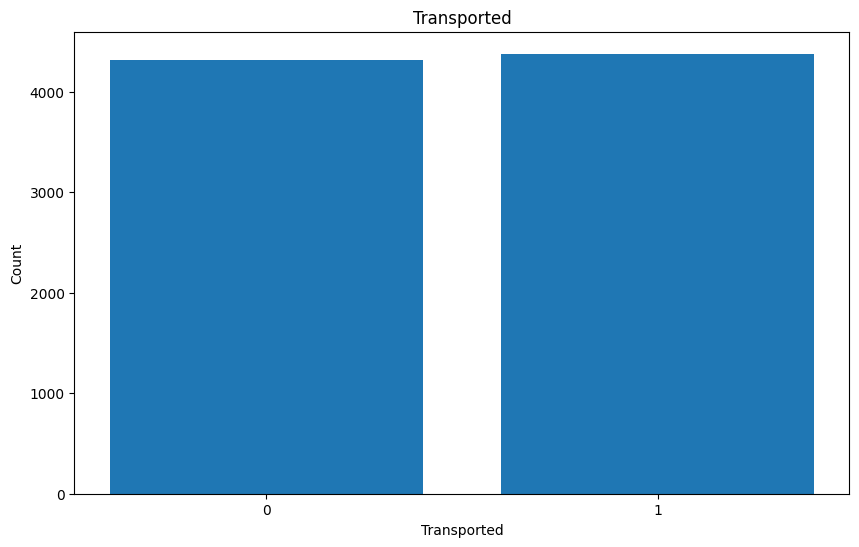

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(transported['Transported'], transported['count'])
plt.xticks(transported['Transported'])
plt.title('Transported')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.show()

In [46]:
data_correlation = data.corr()
data_correlation

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
PassengerId,1.000000,-0.006883,-0.009099,0.013608,0.000375,-0.009200,0.017795,-0.005198,0.015945,0.021491,0.002127,0.004946,-0.008802,0.002310,-0.001458,0.013533,-0.008015,0.002966
CryoSleep,-0.006883,1.000000,-0.071323,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132,-0.109133,0.093395,0.032715,0.007671,0.065589,0.087764,-0.103213,-0.026263
Age,-0.009099,-0.071323,1.000000,0.091863,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233,-0.200003,0.217336,0.015831,-0.000152,0.016817,-0.028121,-0.001231,0.013064
VIP,0.013608,-0.078281,0.091863,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,-0.162341,0.147008,0.043523,0.002041,0.045167,-0.000592,-0.035309,-0.011638
RoomService,0.000375,-0.244089,0.068629,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.138316,-0.066635,0.245222,-0.005421,-0.023441,-0.063354,0.060684,-0.003680
FoodCourt,-0.009200,-0.205928,0.127390,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.208772,0.365102,-0.124755,-0.018165,0.134952,-0.065400,-0.073520,-0.010735
ShoppingMall,0.017795,-0.207798,0.033148,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.069099,-0.021155,0.111654,-0.008430,-0.013739,-0.031245,0.033063,-0.005859
Spa,-0.005198,-0.198307,0.120946,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.155374,0.266103,-0.087989,-0.010428,0.075096,-0.053303,-0.034497,0.007199
VRDeck,0.015945,-0.192721,0.099590,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.152875,0.282556,-0.111863,-0.002003,0.089667,-0.044861,-0.047011,-0.010290
Transported,0.021491,0.460132,-0.074233,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000,-0.169019,0.176916,0.019544,0.002712,0.108722,0.000092,-0.094700,0.000547


<Axes: >

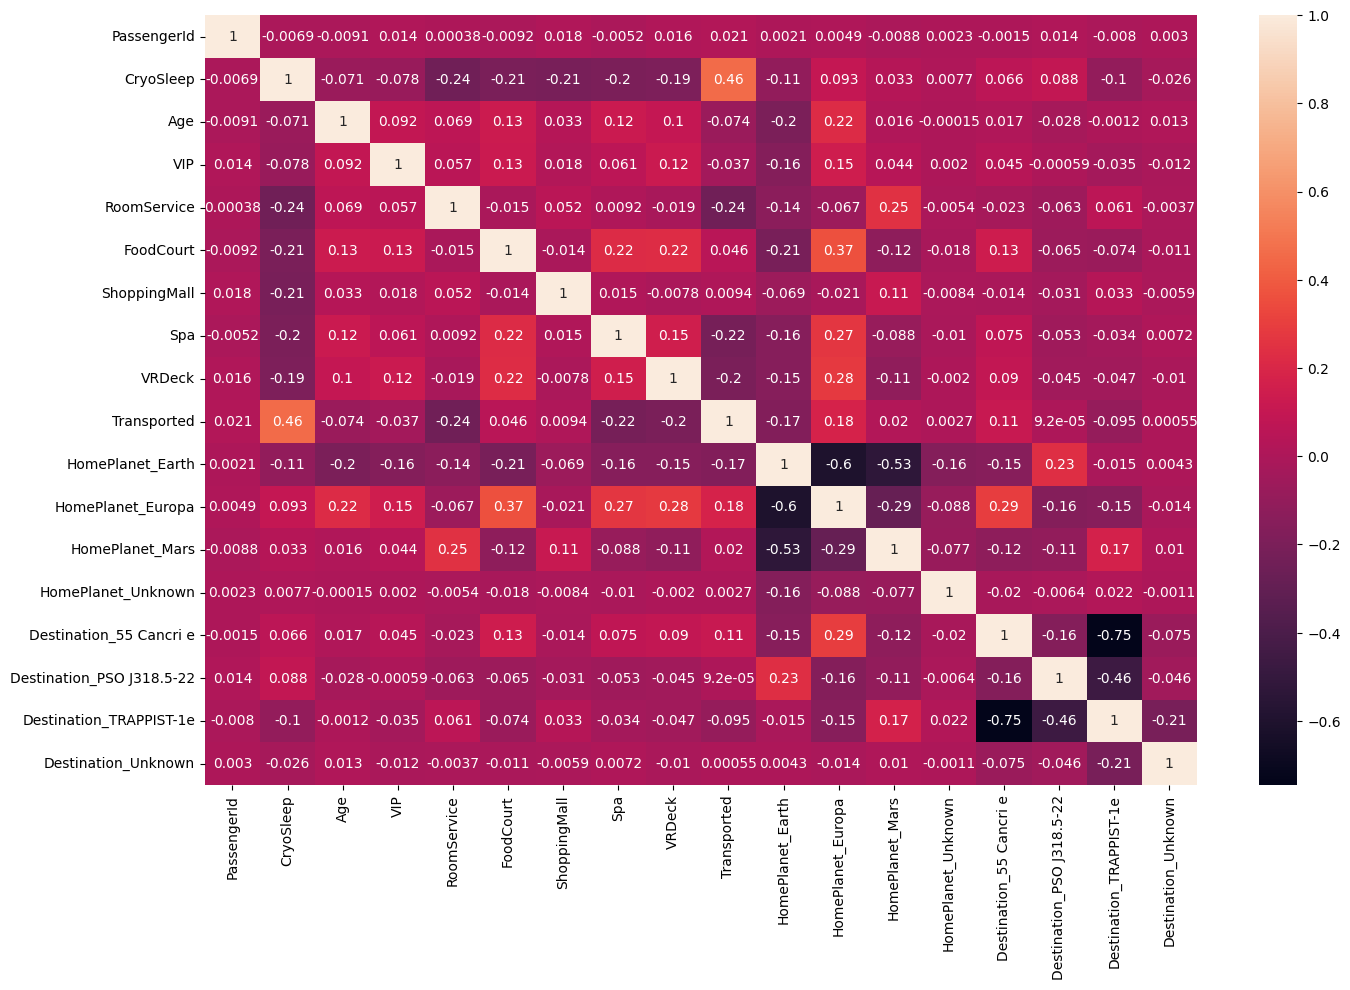

In [48]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_correlation, annot=True)

Cryosleep has quite good correlation with transportation to other dimensions

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr_model = LogisticRegression(max_iter=5000, C=0.1)

In [51]:
X_train = data.drop(columns=['Transported'])
Y_train = data['Transported']

In [52]:
lr_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, max_iter=5000)

In [53]:
test_data = pd.read_csv('spship_dataset/test.csv')
# below is for kaggle notebook
# data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [55]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [57]:
test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [58]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [59]:
test_data.drop(columns=['Cabin', 'Name'], inplace=True)

In [75]:
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(False).astype(bool)

C:\Users\vedes\AppData\Local\Temp\ipykernel_68764\2453553490.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['CryoSleep'] = test_data['CryoSleep'].fillna(False).astype(bool)


In [61]:
test_data['VIP'] = test_data['VIP'].fillna(False).astype(bool)

C:\Users\vedes\AppData\Local\Temp\ipykernel_68764\407286778.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['VIP'] = test_data['VIP'].fillna(False).astype(bool)


In [63]:
test_data['HomePlanet'] = test_data['HomePlanet'].fillna('Unknown')  
test_data['Destination'] = test_data['Destination'].fillna('Unknown')

In [64]:
test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test_data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [66]:
test_data = pd.get_dummies(test_data, columns=['HomePlanet', 'Destination'])

In [67]:
test_data

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,True,False
1,0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,True,False,False,False,False,False,True,False
2,0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False
3,0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,False,True,False,False,False,False,True,False
4,0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,True,False
4273,9269_01,False,42.0,False,0.0,847.0,17.0,10.0,144.0,True,False,False,False,False,False,True,False
4274,9271_01,True,26.0,False,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False,False,False
4275,9273_01,False,26.0,False,0.0,2680.0,0.0,0.0,523.0,False,True,False,False,False,False,False,True


In [68]:
lr_model.score(X_train, Y_train)

0.7846543195674681

In [69]:
y_pred_train = lr_model.predict(X_train)

In [70]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(Y_train, y_pred_train))

              precision    recall  f1-score   support

       False       0.79      0.77      0.78      4315
        True       0.78      0.80      0.79      4378

    accuracy                           0.78      8693
   macro avg       0.78      0.78      0.78      8693
weighted avg       0.78      0.78      0.78      8693



In [76]:
test_data.isnull().sum()

PassengerId                  0
CryoSleep                    0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
HomePlanet_Unknown           0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Destination_Unknown          0
dtype: int64

In [77]:
y_pred = lr_model.predict(test_data)

In [78]:
test_data['Transported'] = y_pred
test_data

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown,Transported
0,0013_01,True,27.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,True,False,True
1,0018_01,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,True,False,False,False,False,False,True,False,False
2,0019_01,True,31.0,False,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False,True
3,0021_01,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,False,True,False,False,False,False,True,False,True
4,0023_01,False,20.0,False,10.0,0.0,635.0,0.0,0.0,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,True,34.0,False,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,True,False,True
4273,9269_01,False,42.0,False,0.0,847.0,17.0,10.0,144.0,True,False,False,False,False,False,True,False,False
4274,9271_01,True,26.0,False,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False,False,False,True
4275,9273_01,False,26.0,False,0.0,2680.0,0.0,0.0,523.0,False,True,False,False,False,False,False,True,True


In [81]:
test_data[['PassengerId', 'Transported']].to_csv('spship_dataset/predictions.csv', index=False)